In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
csv_in = '../cancer.csv'

# To show all rows and columns in the results 
pd.options.display.max_columns=999
pd.options.display.max_rows=999

In [5]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=14, header=0)
print(df.shape)
print(df.info())
display(df.head())

(569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       569 non-null    int64  
 1   Diag     569 non-null    object 
 2   ave_a    569 non-null    float64
 3   ave_b    569 non-null    float64
 4   ave_c    569 non-null    float64
 5   ave_d    569 non-null    float64
 6   ave_e    569 non-null    float64
 7   ave_f    569 non-null    float64
 8   ave_g    569 non-null    float64
 9   ave_h    569 non-null    float64
 10  ave_i    569 non-null    float64
 11  ave_j    569 non-null    float64
 12  se_a     569 non-null    float64
 13  se_b     569 non-null    float64
 14  se_c     569 non-null    float64
 15  se_d     569 non-null    float64
 16  se_e     569 non-null    float64
 17  se_f     569 non-null    float64
 18  se_g     569 non-null    float64
 19  se_h     569 non-null    float64
 20  se_i     569 non-null    float64
 21  se_j  

,ID,Diag,ave_a,ave_b,ave_c,ave_d,ave_e,ave_f,ave_g,ave_h,ave_i,ave_j,se_a,se_b,se_c,se_d,se_e,se_f,se_g,se_h,se_i,se_j,worst_a,worst_b,worst_c,worst_d,worst_e,worst_f,worst_g,worst_h,worst_i,worst_j
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
len(df[df['Diag']=='M'])

212

In [9]:
len(df[df['Diag']=='B'])

357

In [10]:
dfX = df.loc[:, 'ave_a':]
print(dfX.shape)
display(dfX.head())

(569, 30)


,ave_a,ave_b,ave_c,ave_d,ave_e,ave_f,ave_g,ave_h,ave_i,ave_j,se_a,se_b,se_c,se_d,se_e,se_f,se_g,se_h,se_i,se_j,worst_a,worst_b,worst_c,worst_d,worst_e,worst_f,worst_g,worst_h,worst_i,worst_j
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
sc = StandardScaler()
X_std = sc.fit_transform(dfX)

In [12]:
n_pca = 7
pca = PCA(n_components=n_pca)
X_pca = pca.fit_transform(X_std)

In [13]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953 ]


In [14]:
ser_class = df['Diag']
print(ser_class.value_counts())

B    357
M    212
Name: Diag, dtype: int64


In [15]:
classes = ser_class.unique()
print(classes)
colors = ['blue', 'red']

['M' 'B']


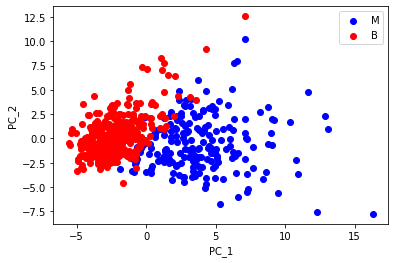

In [16]:
pca_x = X_pca[:, 0]
pca_y = X_pca[:, 1]
for i in range(len(classes)):
    cls = classes[i]
    c = colors[i]
    plt.scatter(pca_x[ser_class==cls], pca_y[ser_class==cls],
                c=c, label=cls)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.legend()
plt.show()

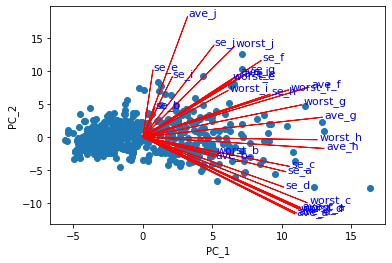

In [19]:
def biplot(X_2d, coef_2d, coef_labels=None):
    r1 = 50
    r2 = 1.01
    coef_2dT = coef_2d.T
    if coef_labels is None:
        coef_labels = range(len(coef_2dT))
    for i, coef in enumerate(coef_2dT):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, coef_labels[i],
                 color='b', fontsize=11)
    plt.scatter(X_2d[:,0], X_2d[:,1])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    return None

biplot(X_pca[:, :2], pca.components_[:2], coef_labels=dfX.columns)